In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [5]:
data = pd.read_csv('/content/drive/MyDrive/pml/ml/Crop and fertilizer dataset.csv')
data

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
...,...,...,...,...,...,...,...,...,...,...,...
4508,Pune,Black,130,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4509,Pune,Black,135,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4510,Pune,Black,140,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo
4511,Pune,Black,145,80,150,7.0,1400,30,Sugarcane,MOP,https://youtu.be/2t5Am0xLTOo


In [6]:
# Menghapus kolom yang diinginkan
kolom_yang_diinginkan = ['Link']
data.drop(columns=kolom_yang_diinginkan, inplace=True)

# Menampilkan DataFrame setelah penghapusan kolom
print("\nDataFrame setelah penghapusan kolom:")
print(data)


DataFrame setelah penghapusan kolom:
     District_Name Soil_color  Nitrogen  Phosphorus  Potassium   pH  Rainfall  \
0         Kolhapur      Black        75          50        100  6.5      1000   
1         Kolhapur      Black        80          50        100  6.5      1000   
2         Kolhapur      Black        85          50        100  6.5      1000   
3         Kolhapur      Black        90          50        100  6.5      1000   
4         Kolhapur      Black        95          50        100  6.5      1000   
...            ...        ...       ...         ...        ...  ...       ...   
4508          Pune      Black       130          80        150  7.0      1400   
4509          Pune      Black       135          80        150  7.0      1400   
4510          Pune      Black       140          80        150  7.0      1400   
4511          Pune      Black       145          80        150  7.0      1400   
4512          Pune      Black       150          80        150  7.0    

# **Eksplorasi Data**

In [7]:
print(data.describe())

          Nitrogen   Phosphorus    Potassium           pH     Rainfall  \
count  4513.000000  4513.000000  4513.000000  4513.000000  4513.000000   
mean     95.409927    54.341901    63.595170     6.715267   819.189010   
std      38.060648    16.551991    35.691911     0.625198   251.730813   
min      20.000000    10.000000     5.000000     5.500000   300.000000   
25%      60.000000    40.000000    40.000000     6.000000   600.000000   
50%     105.000000    55.000000    55.000000     6.500000   800.000000   
75%     125.000000    65.000000    75.000000     7.000000  1000.000000   
max     150.000000    90.000000   150.000000     8.500000  1700.000000   

       Temperature  
count  4513.000000  
mean     25.915134  
std       5.897328  
min      10.000000  
25%      20.000000  
50%      25.000000  
75%      30.000000  
max      40.000000  


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 352.7+ KB


In [9]:
duplikat = data[data.duplicated()]
if not duplikat.empty:
    print("Data duplikat:")
    print(duplikat)
else:
    print("Tidak ada data duplikat.")

Tidak ada data duplikat.


In [10]:
kosong = data[data.isnull().any(axis=1)]
if not kosong.empty:
    print("\nData kosong:")
    print(kosong)
else:
    print("\nTidak ada data kosong.")


Tidak ada data kosong.


In [11]:
data["Soil_color"] = data["Soil_color"].str.strip()
data["Soil_color"].unique()

array(['Black', 'Red', 'Medium Brown', 'Dark Brown', 'Light Brown',
       'Reddish Brown'], dtype=object)

In [12]:
unik_crop = data['Crop'].unique()
jumlah_unik_crop = data['Crop'].nunique()
print("Nilai unik pada kolom 'Crop' (Jumlah: {})".format(jumlah_unik_crop))
print(unik_crop)

unik_fertilizer = data['Fertilizer'].unique()
jumlah_unik_fertilizer = data['Fertilizer'].nunique()
print("\nNilai unik pada kolom 'Fertilizer' (Jumlah: {})".format(jumlah_unik_fertilizer))
print(unik_fertilizer)

unik_soil_color = data['Soil_color'].unique()
jumlah_unik_soil_color = data['Soil_color'].nunique()
print("\nNilai unik pada kolom 'Soil_color' (Jumlah: {})".format(jumlah_unik_soil_color))
print(unik_soil_color)

Nilai unik pada kolom 'Crop' (Jumlah: 16)
['Sugarcane' 'Jowar' 'Cotton' 'Rice' 'Wheat' 'Groundnut' 'Maize' 'Tur'
 'Urad' 'Moong' 'Gram' 'Masoor' 'Soybean' 'Ginger' 'Turmeric' 'Grapes']

Nilai unik pada kolom 'Fertilizer' (Jumlah: 19)
['Urea' 'DAP' 'MOP' '10:26:26 NPK' 'SSP' 'Magnesium Sulphate'
 '13:32:26 NPK' '12:32:16 NPK' '50:26:26 NPK' '19:19:19 NPK'
 'Chilated Micronutrient' '18:46:00 NPK' 'Sulphur' '20:20:20 NPK'
 'Ammonium Sulphate' 'Ferrous Sulphate' 'White Potash' '10:10:10 NPK'
 'Hydrated Lime']

Nilai unik pada kolom 'Soil_color' (Jumlah: 6)
['Black' 'Red' 'Medium Brown' 'Dark Brown' 'Light Brown' 'Reddish Brown']


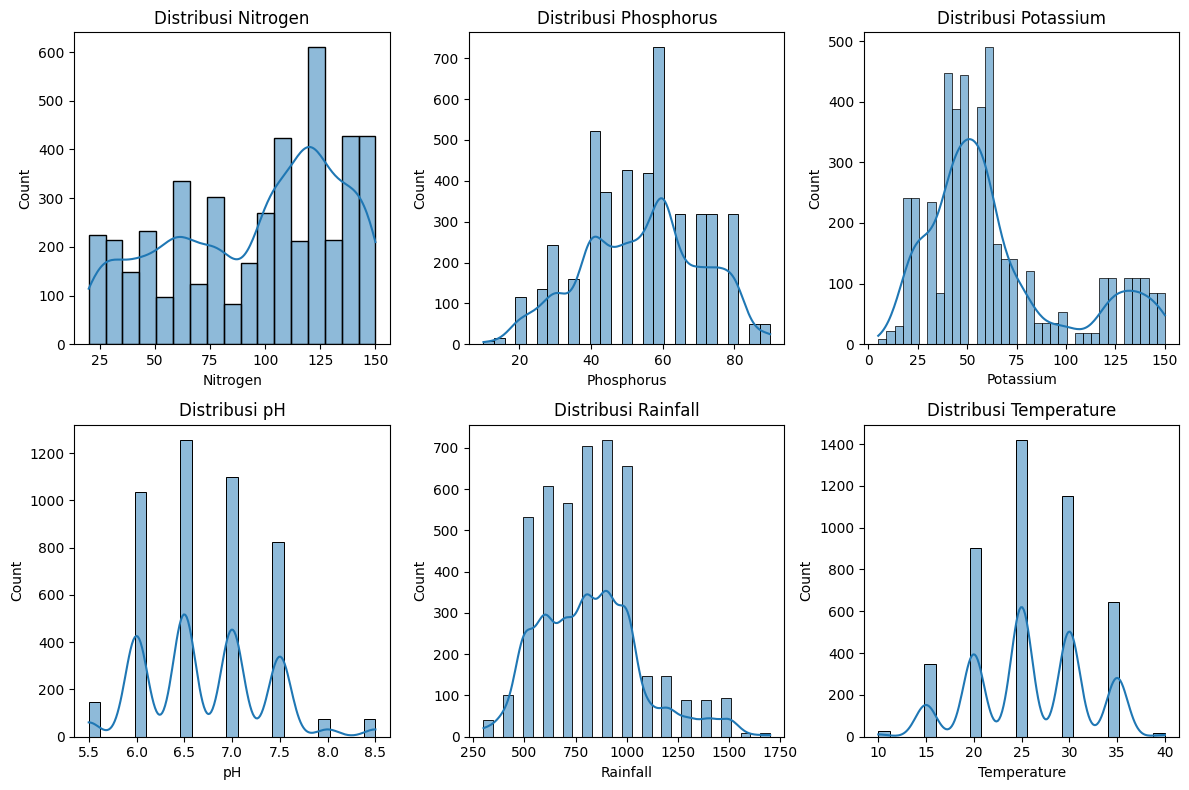

In [13]:
# Visualisasi distribusi dan pola dalam data numerik
plt.figure(figsize=(12, 8))

# Histogram untuk fitur numerik
numeric_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribusi {feature}')

plt.tight_layout()
plt.show()

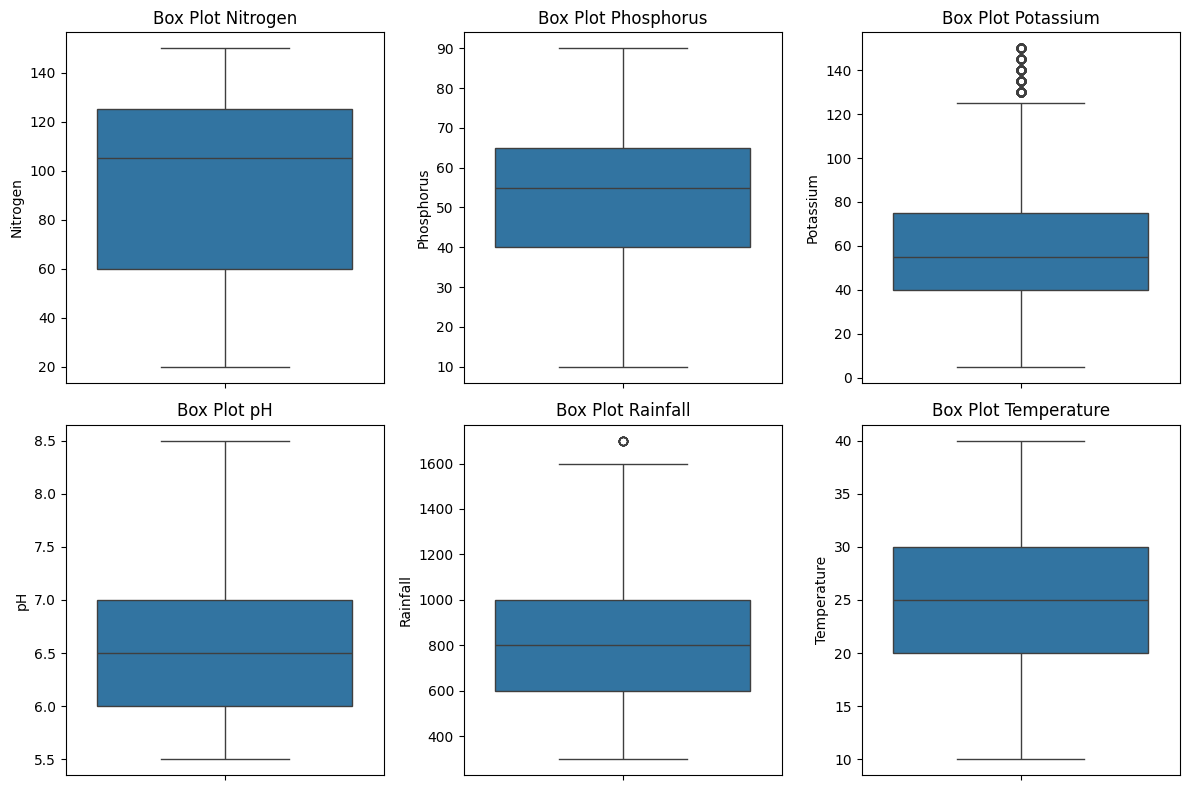

In [14]:
# Box plot untuk fitur numerik
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot {feature}')

plt.tight_layout()
plt.show()

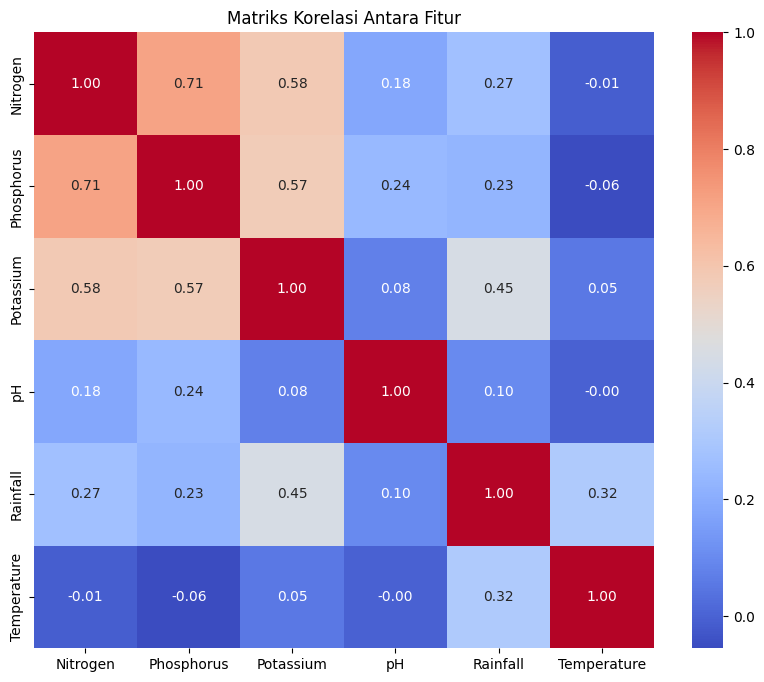

In [15]:
# Heatmap untuk matriks korelasi antar fitur
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antara Fitur')
plt.show()

# **PREPROSES**

ENCODE pada fitur dengan tipe data selain integer

In [16]:
kolom_encode = ['Crop', 'Fertilizer', 'Soil_color','District_Name']

encoder_dict = {}

for kolom in kolom_encode:
    encoder = LabelEncoder()
    data[kolom+'_encoded'] = encoder.fit_transform(data[kolom])
    encoder_dict[kolom] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for kolom in kolom_encode:
    data[kolom] = data[kolom+'_encoded']
    data.drop(columns=[kolom+'_encoded'], inplace=True)

print("DataFrame dengan data yang telah diencode:")
print(data)

print("\nDictionary korespondensi nilai asli dan nilai terkodena:")
print(encoder_dict)

DataFrame dengan data yang telah diencode:
      District_Name  Soil_color  Nitrogen  Phosphorus  Potassium   pH  \
0                 0           0        75          50        100  6.5   
1                 0           0        80          50        100  6.5   
2                 0           0        85          50        100  6.5   
3                 0           0        90          50        100  6.5   
4                 0           0        95          50        100  6.5   
...             ...         ...       ...         ...        ...  ...   
4508              1           0       130          80        150  7.0   
4509              1           0       135          80        150  7.0   
4510              1           0       140          80        150  7.0   
4511              1           0       145          80        150  7.0   
4512              1           0       150          80        150  7.0   

      Rainfall  Temperature  Crop  Fertilizer  
0         1000           20    1

In [17]:
data

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer
0,0,0,75,50,100,6.5,1000,20,11,17
1,0,0,80,50,100,6.5,1000,20,11,17
2,0,0,85,50,100,6.5,1000,20,11,17
3,0,0,90,50,100,6.5,1000,20,11,17
4,0,0,95,50,100,6.5,1000,20,11,17
...,...,...,...,...,...,...,...,...,...,...
4508,1,0,130,80,150,7.0,1400,30,11,13
4509,1,0,135,80,150,7.0,1400,30,11,13
4510,1,0,140,80,150,7.0,1400,30,11,13
4511,1,0,145,80,150,7.0,1400,30,11,13


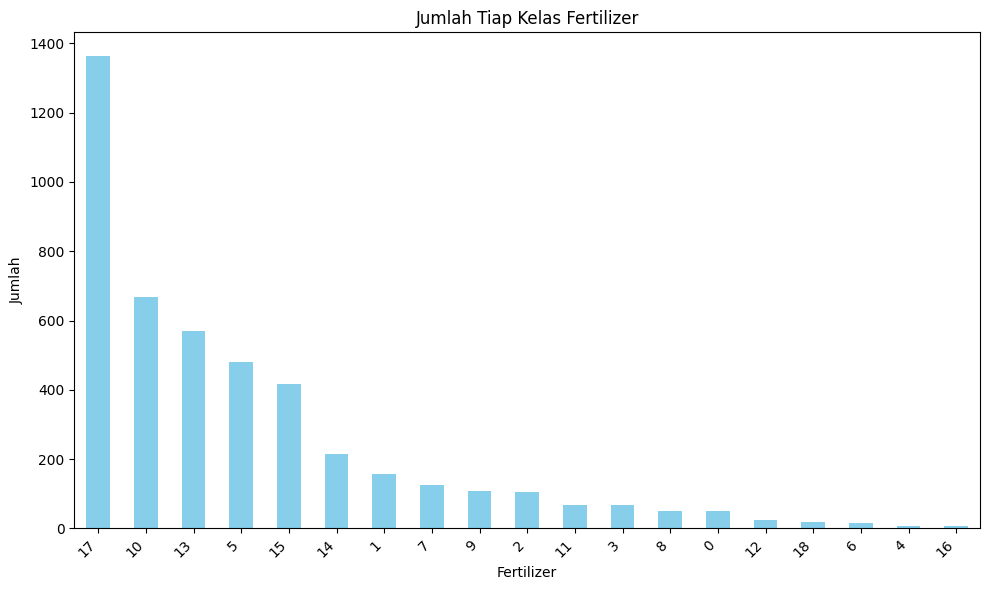

In [18]:
fertilizer_counts = data['Fertilizer'].value_counts()

plt.figure(figsize=(10, 6))
fertilizer_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Tiap Kelas Fertilizer')
plt.xlabel('Fertilizer')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [19]:
data['Fertilizer'].value_counts()

,count
Fertilizer,
17,1364
10,667
13,571
5,480
15,417
14,215
1,156
7,124
9,108


In [20]:
# Memisahkan fitur dan target
X = data.drop(columns=['Fertilizer'])  # Memilih semua fitur kecuali target 'Fertilizer'
y = data['Fertilizer']

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Applying Chi-Square feature selection and
# Selecting top k features
k = 7
chi2_selector = SelectKBest(chi2, k=k)
X_new = chi2_selector.fit_transform(X, y)

selected_features = data.columns[:-1][chi2_selector.get_support()]
print("\nSelected Features:")
print(selected_features)
# Converting to DataFrame for better visualization


Selected Features:
Index(['Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'Rainfall',
       'Temperature', 'Crop'],
      dtype='object')


In [22]:
# Membuat DataFrame baru dengan fitur yang terpilih dan target
data_selected = pd.DataFrame(X_new, columns=selected_features)
data_selected['Fertilizer'] = y.values

print("\nData dengan fitur yang terpilih:")
print(data_selected)


Data dengan fitur yang terpilih:
      Soil_color  Nitrogen  Phosphorus  Potassium  Rainfall  Temperature  \
0            0.0      75.0        50.0      100.0    1000.0         20.0   
1            0.0      80.0        50.0      100.0    1000.0         20.0   
2            0.0      85.0        50.0      100.0    1000.0         20.0   
3            0.0      90.0        50.0      100.0    1000.0         20.0   
4            0.0      95.0        50.0      100.0    1000.0         20.0   
...          ...       ...         ...        ...       ...          ...   
4508         0.0     130.0        80.0      150.0    1400.0         30.0   
4509         0.0     135.0        80.0      150.0    1400.0         30.0   
4510         0.0     140.0        80.0      150.0    1400.0         30.0   
4511         0.0     145.0        80.0      150.0    1400.0         30.0   
4512         0.0     150.0        80.0      150.0    1400.0         30.0   

      Crop  Fertilizer  
0     11.0          17  
1  

In [23]:
import pandas as pd

# Get the scores of each feature
chi2_scores = chi2_selector.scores_

# Create a DataFrame with features and scores
features_scores_df = pd.DataFrame({'Feature': data.columns[:-1], 'Score': chi2_scores})

# Sort the DataFrame by scores in descending order
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Print the DataFrame
print(features_scores_df)


         Feature         Score
6       Rainfall  72025.377903
4      Potassium  26139.583182
2       Nitrogen  18830.755079
8           Crop   8573.747599
3     Phosphorus   3807.140590
1     Soil_color   1729.594439
7    Temperature    999.573415
0  District_Name    426.876437
5             pH     14.906032


In [24]:
X_new = X[selected_features]
y = data['Fertilizer']

In [25]:
# Menghitung varians per kelas pada kolom 'Fertilizer'
varians_per_kelas = data_selected.groupby('Fertilizer').size().reset_index(name='Jumlah')

# Mengurutkan kelas berdasarkan jumlah dari yang terbesar ke yang terkecil
kelas_dengan_jumlah_terbanyak = varians_per_kelas.sort_values(by='Jumlah', ascending=False)

# Menghitung jumlah data yang akan dipilih dari kelas 17
target_count = 550

# Menghitung jumlah data yang tersedia pada kelas 17
available_count = kelas_dengan_jumlah_terbanyak.loc[kelas_dengan_jumlah_terbanyak['Fertilizer'] == 17, 'Jumlah'].values[0]

# Menentukan berapa banyak data yang akan dipilih dari kelas 17
ratio = target_count / available_count

# Mengambil data dari kelas 17 sesuai dengan rasio yang ditentukan
selected_data_17 = data_selected[data_selected['Fertilizer'] == 17].sample(frac=ratio, random_state=42)

# Mengambil data dari kelas lain
selected_data_others = data_selected[data_selected['Fertilizer'] != 17]

# Menggabungkan data dari kelas 17 dengan data dari kelas lain
selected_data = pd.concat([selected_data_17, selected_data_others])

# Pisahkan fitur dan target dari data yang terpilih
X = selected_data.drop(columns=['Fertilizer'])
y = selected_data['Fertilizer']


In [26]:
y.value_counts()

,count
Fertilizer,
10,667
13,571
17,550
5,480
15,417
14,215
1,156
7,124
9,108


STANDARISASI DATA

In [27]:
# X = data.drop(columns=['Fertilizer'])  # Memilih semua fitur kecuali target 'Fertilizer'
# y = data['Fertilizer']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Hasil standarisasi fitur:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Hasil standarisasi fitur:
   Soil_color  Nitrogen  Phosphorus  Potassium  Rainfall  Temperature  \
0    1.246137 -0.533332   -0.265184  -0.663983 -0.869492    -1.033005   
1   -0.845982 -0.663275   -0.867898  -0.523756 -0.467762    -0.180465   
2   -0.845982  1.025984    0.638886   2.140554  0.335698     0.672076   
3   -0.845982  1.155927    0.638886   0.037151  1.139158    -0.180465   
4    1.246137 -0.403389   -0.265184  -0.663983 -0.869492    -1.033005   

       Crop  
0  1.387578  
1  1.387578  
2  0.627044  
3  0.627044  
4  1.387578  


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={11:100, 3:100, 8:100, 0:100, 12:60, 18:50, 6:50, 16:50,4:50}, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
Fertilizer,
10,479
13,416
17,363
5,341
15,292
14,145
1,111
3,100
0,100


In [30]:
print("Ukuran data latih sebelum resampling:", X_train.shape)

print("Ukuran data latih setelah resampling:", X_train_resampled.shape)

Ukuran data latih sebelum resampling: (2589, 7)
Ukuran data latih setelah resampling: (3047, 7)


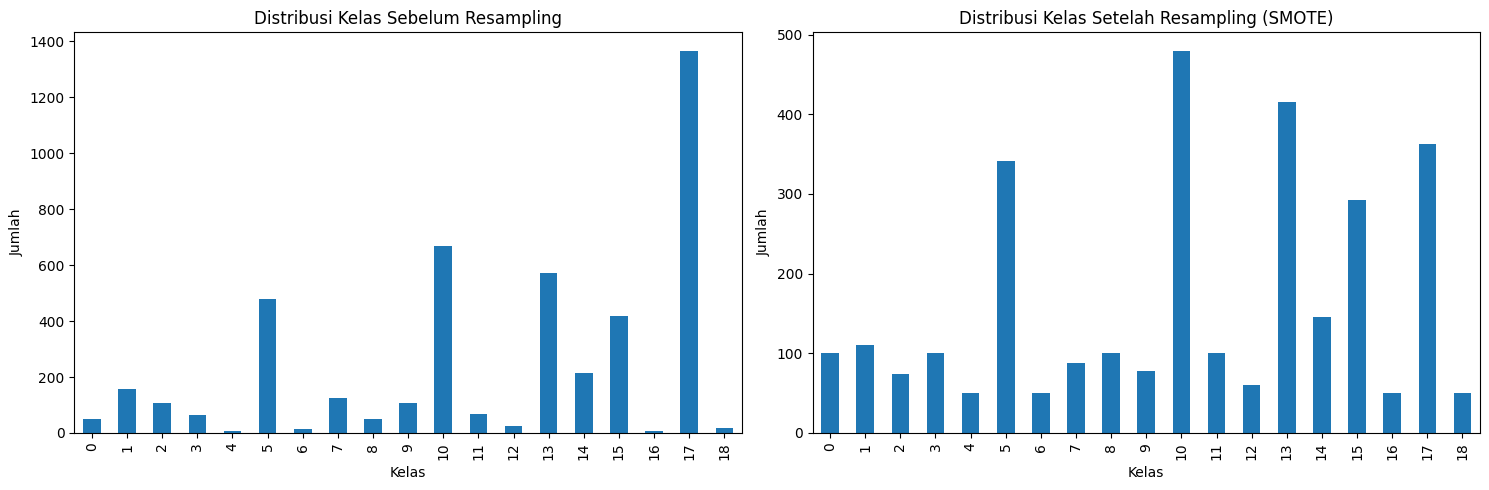

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
data['Fertilizer'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Setelah Resampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [32]:
X_train_resampled

array([[ 1.24613693,  0.24632617, -0.86789821, ..., -0.06603186,
        -0.18046479, -1.4644226 ],
       [-0.32295209,  0.50621222,  0.03617261, ..., -0.46776185,
        -0.18046479,  1.38757768],
       [ 1.24613693, -1.96270525, -1.4706121 , ..., -0.46776185,
        -0.18046479, -0.70388919],
       ...,
       [-0.84598176, -1.83276223, -2.07332598, ...,  2.74607808,
        -1.03300533,  1.00731098],
       [-0.84598176, -1.72621722, -1.4706121 , ...,  3.54953806,
         0.67207575,  1.00731098],
       [-0.84598176, -1.89798891, -2.07332598, ...,  2.74607808,
        -1.03300533,  1.00731098]])

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)
print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 0.8153153153153153

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.77      0.89      0.82        45
           2       0.91      0.97      0.94        32
           3       1.00      0.83      0.91        24
           4       1.00      0.67      0.80         3
           5       0.82      0.96      0.88       139
           6       1.00      1.00      1.00         3
           7       0.77      1.00      0.87        36
           8       0.49      0.94      0.64        18
           9       0.66      0.70      0.68        30
          10       0.81      0.91      0.86       188
          11       0.88      0.88      0.88        24
          12       1.00      0.88      0.93         8
          13       0.89      0.89      0.89       155
          14       0.87      0.76      0.81        70
          15       0.79      0.80      0.79       125
 

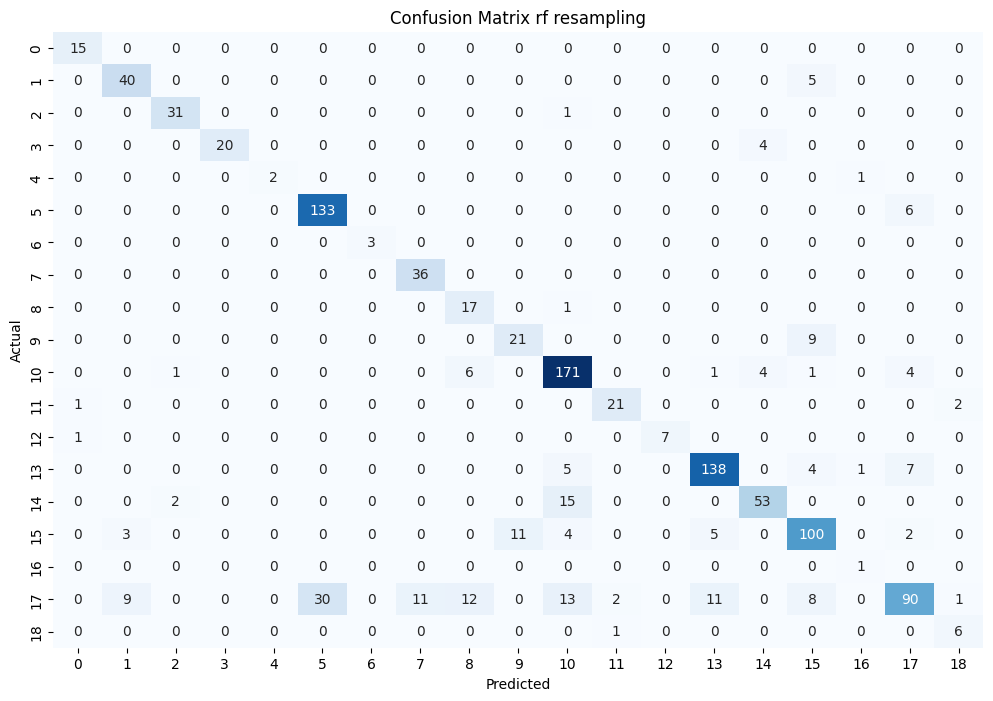

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix rf resampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn_model.predict(X_test)


print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred_knn))


Classification Report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      0.87      0.83        45
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00         3
           5       0.89      0.98      0.93       139
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89        36
           8       0.76      0.89      0.82        18
           9       0.96      0.90      0.93        30
          10       0.89      0.97      0.93       188
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00         8
          13       0.94      0.97      0.96       155
          14       0.97      0.89      0.93        70
          15       0.89      0.89      0.89       125
          16       1.00      1.00      1.00         1

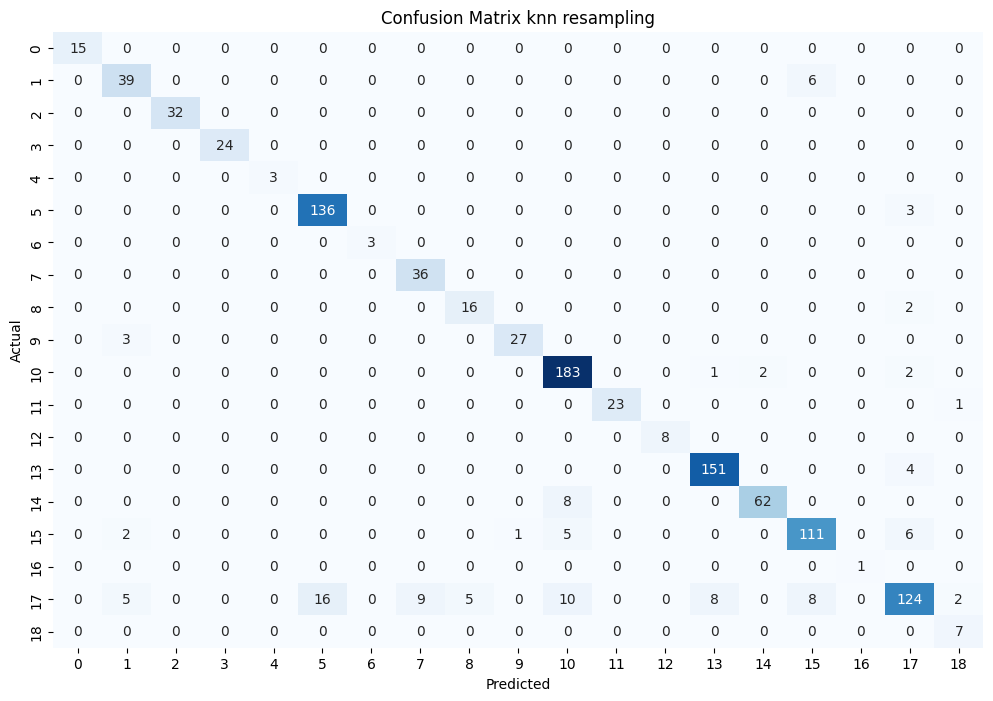

In [37]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(12, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix knn resampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

__________________________________________________________________________________

__________________________________________________________________________________

__________________________________________________________________________________

__________________________________________________________________________________

__________________________________________________

__________________________________________________

__________________________________________________

__________________________________________________